# Setup

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Caricamento dataset

In [17]:
df = pd.read_csv("../sentiment_data/preprocessed_data.csv", encoding='latin1')
df.head()

,label,text,cleaned_text
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...


## Distribuzione della lunghezza del testo (dataset preprocessato)

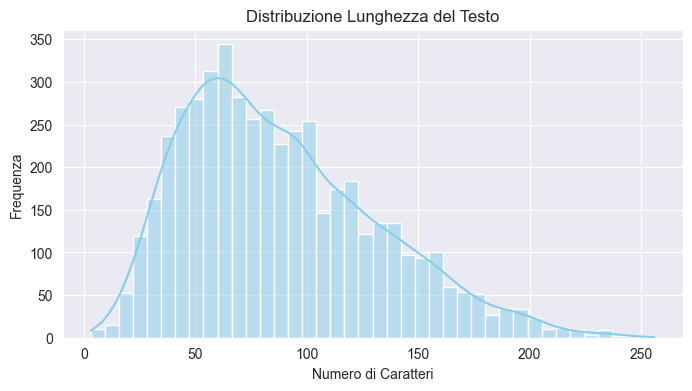

Statistiche sulla lunghezza delle frasi:
Media della lunghezza delle frasi: 88.25
Mediana della lunghezza delle frasi: 81.0
Lunghezza minima delle frasi: 3
Lunghezza massima delle frasi: 256


In [7]:
df['text_len'] = df['cleaned_text'].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df['text_len'], bins=40, kde=True, color='skyblue')
plt.title("Distribuzione Lunghezza del Testo")
plt.xlabel("Numero di Caratteri")
plt.ylabel("Frequenza")
plt.show()
print("Statistiche sulla lunghezza delle frasi:")
print(f"Media della lunghezza delle frasi: {df['text_len'].mean():.2f}")
print(f"Mediana della lunghezza delle frasi: {df['text_len'].median()}")
print(f"Lunghezza minima delle frasi: {df['text_len'].min()}")
print(f"Lunghezza massima delle frasi: {df['text_len'].max()}")

## Boxplot per la lunghezza delle frasi (in numero di caratteri)

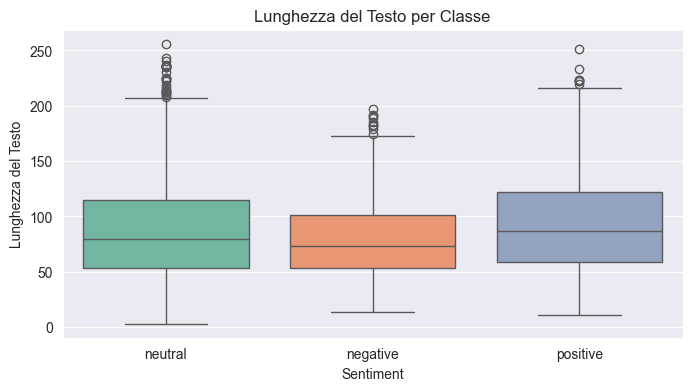


Classe: neutral
Numero di outlier: 27
Media: 87.22
Mediana: 80.0
Min: 3
Max: 256

Classe: negative
Numero di outlier: 10
Media: 81.61
Mediana: 73.0
Min: 14
Max: 197

Classe: positive
Numero di outlier: 7
Media: 93.38
Mediana: 87.0
Min: 11
Max: 251


In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='label', hue='label',y='text_len', palette='Set2')
plt.title("Lunghezza del Testo per Classe")
plt.xlabel("Sentiment")
plt.ylabel("Lunghezza del Testo")
plt.show()


for label in df['label'].unique():
    subset = df[df['label'] == label]
    Q1 = subset['text_len'].quantile(0.25)
    Q3 = subset['text_len'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    label_outliers = subset[(subset['text_len'] < lower_bound) | (subset['text_len'] > upper_bound)]

    print(f"\nClasse: {label}")
    print(f"Numero di outlier: {label_outliers.shape[0]}")
    print(f"Media: {subset['text_len'].mean():.2f}")
    print(f"Mediana: {subset['text_len'].median()}")
    print(f"Min: {subset['text_len'].min()}")
    print(f"Max: {subset['text_len'].max()}")


## Violion plot per il confronto tra i due dataset (originale-preprocessato)

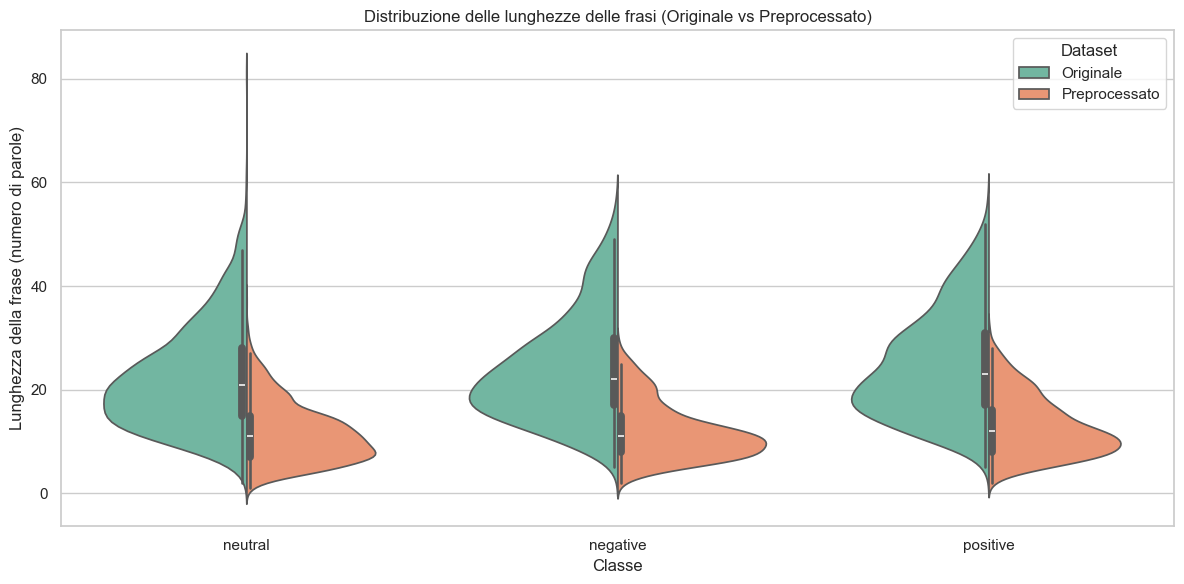

Classe: neutral
  - Originale: media=22.18, mediana=21.0, max=81, min=2
  - Preprocessato: media=11.65, mediana=11.0, max=38, min=1

Classe: negative
  - Originale: media=23.92, mediana=22.0, max=56, min=5
  - Preprocessato: media=11.86, mediana=11.0, max=29, min=2

Classe: positive
  - Originale: media=24.69, mediana=23.0, max=57, min=5
  - Preprocessato: media=12.87, mediana=12.0, max=32, min=2



In [35]:
# Calcolo lunghezza (in numero di parole) delle frasi originali e preprocessate
df['length_original'] = df['text'].apply(str).apply(lambda x: len(x.split()))
df['length_preprocessed'] = df['cleaned_text'].apply(str).apply(lambda x: len(x.split()))

#  DataFrame per il confronto
df_original = df[['label', 'length_original']].rename(columns={'length_original': 'length'})
df_original['dataset'] = 'Originale'

df_preprocessed = df[['label', 'length_preprocessed']].rename(columns={'length_preprocessed': 'length'})
df_preprocessed['dataset'] = 'Preprocessato'

# Unione dei due dataset
combined_df = pd.concat([df_original, df_preprocessed])


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.violinplot(data=combined_df, x='label', y='length', hue='dataset', split=True, palette="Set2")

plt.title("Distribuzione delle lunghezze delle frasi (Originale vs Preprocessato)")
plt.xlabel("Classe")
plt.ylabel("Lunghezza della frase (numero di parole)")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

for label in combined_df['label'].unique():
    orig = df_original[df_original['label'] == label]['length']
    prep = df_preprocessed[df_preprocessed['label'] == label]['length']
    print(f"Classe: {label}")
    print(f"  - Originale: media={orig.mean():.2f}, mediana={orig.median()}, max={orig.max()}, min={orig.min()}")
    print(f"  - Preprocessato: media={prep.mean():.2f}, mediana={prep.median()}, max={prep.max()}, min={prep.min()}")
    print()

**Classe Neutrale**
- Originale: La lunghezza media delle frasi nella classe "neutral" è di circa 22 parole, con una mediana di 21. La lunghezza minima è di 2 parole e la massima di 81. Il numero di frasi che si trovano al di fuori del range interquartile (outliers) è 27, indicando una certa variabilità nelle frasi, che può essere dovuta a frasi molto lunghe o molto corte.
- Preprocessato: Dopo il preprocessing, la lunghezza media delle frasi si riduce significativamente a circa 11 parole, con una mediana di 11. La lunghezza minima delle frasi è di 1 parola e la massima di 38. Anche qui ci sono ancora dei valori estremi (outliers) ma in numero inferiore (27). Il preprocessing ha quindi compresso le frasi, probabilmente rimuovendo parole non necessarie o ridondanti

**Classe Negativa**
-  Originale: Nella classe "negative", le frasi originali hanno una lunghezza media di 24 parole, con una mediana di 22. La lunghezza minima delle frasi è di 5 parole e la massima di 56. Gli outliers in questa classe sono 10, suggerendo una variabilità notevole, probabilmente dovuta a frasi lunghe e complesse.
- Preprocessato: Dopo il preprocessing, la lunghezza media delle frasi scende a circa 12 parole, con una mediana di 11. La lunghezza minima è di 2 parole e la massima di 29. Anche qui, i valori estremi sono stati ridotti, il che conferma che il preprocessing ha ridotto il numero di parole in modo significativo. La diminuzione della lunghezza potrebbe indicare che parole non essenziali o stop words sono state eliminate.

**Classe Positiva**
-  Originale: Per la classe "positive", la lunghezza media delle frasi è di circa 25 parole, con una mediana di 23. La lunghezza minima è di 5 parole e la massima di 57. Anche in questa classe ci sono 7 outliers, segnalando un'alta variabilità.
- Preprocessato: Dopo il preprocessing, la lunghezza media delle frasi scende a 13 parole, con una mediana di 12. La lunghezza minima è di 2 parole e la massima di 32. Il preprocessing ha di nuovo ridotto la lunghezza delle frasi, mantenendo comunque un range di lunghezze che si spinge fino a 32 parole. Come nelle altre classi, le frasi sono state sensibilmente abbreviate.

Il preprocessing ha ridotto la lunghezza media delle frasi in tutte e tre le classi (neutral, negative, positive), con una media che passa da circa 23-25 parole a circa 12-13 parole.

**Outliers**: Anche se il numero di outliers è diminuito in modo generale, ci sono ancora alcuni valori estremi che indicano che ci sono frasi particolarmente lunghe o corte, ma in misura minore rispetto al dataset originale. Successivamente sono state analizzate le frasi con meno di 2 parole

**Effetto del preprocessing**: In generale, il preprocessing sembra aver rimosso molte parole non essenziali, riducendo la lunghezza delle frasi, probabilmente eliminando stop words o parole irrilevanti, e lasciando solo il contenuto più significativo. Questo è positivo per migliorare l'efficienza in modelli NLP (elaborazione del linguaggio naturale), in quanto riduce la "rumorosità" dei dati.


## Elimnazione di valori anomali e creazione di un dataset filtrato

In [49]:
# Soglia per le lunghezze estreme (frasi con meno di o uguali a 2 parole)
soglia_lunghezza = 2

# Filtrare le frasi originali con lunghezza inferiore o uguale alla soglia
frasi_estreme_originale = df[df['length_original'] <= soglia_lunghezza]

# Filtrare le frasi preprocessate con lunghezza inferiore o uguale alla soglia
frasi_estreme_preprocessato = df[df['length_preprocessed'] <= soglia_lunghezza]

# Visualizzare le frasi con lunghezza estremamente bassa nel dataset originale
print("Frasi originali con lunghezza <= 2 parole:")
print(frasi_estreme_originale[['text', 'length_original']])

# Visualizzare le frasi con lunghezza estremamente bassa nel dataset preprocessato
print("\nFrasi preprocessate con lunghezza <= 2 parole:")
print(frasi_estreme_preprocessato[['cleaned_text', 'length_preprocessed']])

# Eliminare le frasi con lunghezza inferiore o uguale alla soglia
df_filtrato = df[(df['length_original'] > soglia_lunghezza) & (df['length_preprocessed'] > soglia_lunghezza)]

# Rimuovere le colonne 'length_original' e 'length_preprocessed'
df_filtrato = df_filtrato.drop(columns=['length_original', 'length_preprocessed'])


numero_righe = df_filtrato.shape[0]
# Visualizzare il numero di righe
print(f"Numero di righe nel dataframe filtrato: {numero_righe}")

print("\nDataframe filtrato (senza frasi <= 2 parole):")
df_filtrato.to_csv("../sentiment_data/filtered_data.csv", index=False)
df_filtrato.head()


Frasi originali con lunghezza <= 2 parole:
           text  length_original
1116  Welcome !                2

Frasi preprocessate con lunghezza <= 2 parole:
               cleaned_text  length_preprocessed
185             ebit margin                    2
1023                welcome                    1
1116                welcome                    1
1461         warmly welcome                    2
1559             fine print                    2
1648        pipeline strong                    2
2323               forecast                    1
2356                  could                    1
2399         right reserved                    2
2554  registration required                    2
2569          status agreed                    2
2724            know people                    2
2921       gearing compared                    2
2972   investment disclosed                    2
2981        expected online                    2
2983                    NaN                    1
3040      

,label,text,cleaned_text,original_length,processed_length
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,25,10
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area less squar...,31,17
2,negative,The international electronic industry company ...,international electronic industry company elco...,36,21
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,33,20
4,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...,41,17


La scelta di eliminare le frasi con una lunghezza inferiore o uguale a 2 parole è motivata da diversi fattori che riguardano la qualità e la rilevanza del dataset per l'analisi del sentiment. Ecco alcune ragioni:

- Affidabilità del contenuto: Frasi molto corte, come "welcome", "cloud", "thik", o singole parole, spesso non offrono un contesto sufficiente per un'analisi semantica accurata. Queste frasi non contribuiscono in modo significativo alla comprensione del sentiment e potrebbero introdurre rumore nel modello di machine learning.
- Coerenza nei dati: La rimozione di frasi troppo corte garantisce che il dataset contenga solo frasi che siano effettivamente significative e comprensibili, con una struttura grammaticale e semantica adeguata per l'analisi.
- Impatto sul modello di sentiment analysis: I modelli di analisi del sentiment, che si basano su tecniche di Natural Language Processing (NLP), richiedono frasi con un numero sufficiente di parole per estrarre informazioni significative. Le frasi corte non offrono abbastanza contenuto per un'analisi accurata del sentimento, quindi eliminarle contribuisce a migliorare le performance del modello.